In [3]:
# imports
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from PIL import Image   
import cv2



In [8]:
def img_to_arr(img_directory, filename, suffix, store_directory):
    img = cv2.imread(img_directory + filename + suffix)
    img = cv2.resize(img, dsize=(30, 30), interpolation=cv2.INTER_CUBIC)
    img = np.ravel(img)
    np.save(store_directory + filename + '.npy', img)
    

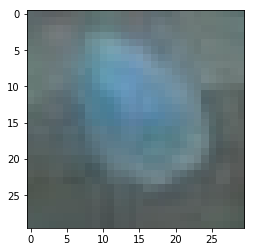

In [9]:
# testing
arr = img_to_arr('training_imgs/', 't1', '.jpg', 'training_imgarr/')
# print(arr.shape)

$\text{Now we convert all images in 'imgs/' file to np arrays in 'imgarr/' folder}$